## System Setup

List of all the python libraries that are required

* numpy 
* pandas
* matplotlib
* seaborn
* wordcloud
* emoji
* jovian

Run the following command to get all the listed python libraries

```pip install numpy pandas matplotlib seaborn wordcloud emoji jovian --upgrade```

Te check whether do you all the required libraries the next should run without any errors

In [3]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter
import codecs

## How to obtain Whatsapp Chat data

* Open whatsapp 
* Open a Group/Inbox
* Click on the 3 dotted options button
* Click on more
* Click on export chat
* Click on without media 
* Export via Email/other IM's/....
* Download to your system rename to chat-data.txt and put it in a folder

![](https://i.imgur.com/KldS1n5.png)


```
Without media: exports 40k messages 
With media: exports 10k messages along with pictures/videos 
As im are doing chat data analysis i went with `without media` option 
```

## Data Preprocessing

* Regex cheatsheet
    * https://www.rexegg.com/regex-quickstart.html
* Regex test - live
    * https://regexr.com/
* Datetime format
    * http://strftime.org/
    
Use a custom a regex and datatime format by reffering to the above links if you run into empty df or format errors. As the exports from whatsapp are not standardized.

In [4]:
def rawToDf(file, key):
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%m/%d/%Y, %I:%M %p - ',
        '24hr' : '%m/%d/%y, %H:%M - ',
        'custom': ''
    }
    #import codecs
    types_of_encoding = ["utf-8"]#"utf-8"#,"cp1252","utf8","cp850","utf-16-le","utf-32-le"]
    for encoding_type in types_of_encoding:
        with codecs.open(file,encoding= encoding_type, errors= 'strict') as raw_data:
            raw_string = ' '.join(raw_data.read().split('\n')) 
            user_msg = re.split(split_formats[key], raw_string) [1:] 
            date_time = re.findall(split_formats[key], raw_string)
            
            df = pd.DataFrame({'date_time':date_time, 'user_msg': user_msg})
            
    #with open(file, 'r') as raw_data:
    #    raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
    #    user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
    #    date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
    #    df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("grp_notif")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

### Import data

In [5]:
df = rawToDf("WhatsApp Chat with KSBL MBA '15.txt", '24hr')

In [6]:
df.tail()

,date_time,user,msg
1580,2021-07-22 22:14:00,Taimoor Ksbl,ذیشان بھائی سب خیریت ہے نا?
1581,2021-07-23 10:48:00,Shahan,إِنَّا لِلّهِ وَإِنَّـا إِلَيْهِ رَاجِعونَ
1582,2021-07-25 20:19:00,+92 307 0220252,https://youtu.be/c0yDO_xrEYA
1583,2021-07-26 12:13:00,Ahsan KSBL,This message was deleted
1584,2021-08-02 09:35:00,Zeeshan Jessani Ksbl,Anyone using optix ?


In [7]:
df.shape # no. of msgs

(1585, 3)

In [8]:
me = "Taimoor Ksbl"

### Data Cleaning

In [9]:
images = df[df['msg']=="<Media omitted> "] #no. of images, images are represented by <media omitted>
images.shape

(235, 3)

In [10]:
df["user"].unique()

array(['grp_notif', 'Mir Rafay Hussain Ksbl', 'Maaz Ksbl', 'Bariya Ksbl',
       'Ahsan KSBL', '+92 343 5791303', 'Usman Ksbl', 'Taimoor Ksbl',
       'Mustafa Chaudh Ksbl', 'Jimmy Ksbl', 'Shahid Ksbl',
       'Arsalan Mushtaq Ksbl', 'Yasir Ksbl', 'hamza ksbl', 'Saad Ksbl',
       'Khushnaveed Ksbl', 'Fahad Ksbl', 'Absar Ksbl', 'Mohsin Puri Ksbl',
       'Muzamil Ksbl', 'Jz Ksbl', '+92 301 8203999', 'Danish Ksbl',
       'Adnan Ksbl', 'Awais Maan KSBL', 'Zeeshan Jessani Ksbl',
       'Qudrat KSBL', 'Zohaib Ksbl', 'Shahzeb Ksbl', 'Rehman Ksbl',
       'Sohaib Qureshi Ksbl', 'Aisar Ksbl', 'Salik Ksbl', 'Shariq Ksbl',
       'Salman Ksbl', '+92 331 2362997', '+92 300 7001118',
       'Maqbool Ksbl', 'Budhani KSBL', 'Umar Aslam Ksbl',
       '+1 (919) 937-0545', '+92 345 6187766', 'Faraz Ksbl', 'Bilal Ksbl',
       'Rida Zubairi', 'Huzair Ksbl', 'Khubab Ksbl', 'Shahan',
       '+92 307 0220252', '+92 331 8887275', 'Ali Raza Bajwa Ksbl',
       'Anwaar Ksbl', 'Hamid Ksbl', 'Mustafa Sec B Ks

In [11]:
grp_notif = df[df['user']=="grp_notif"] #no. of grp notifications
grp_notif.shape

(173, 3)

In [12]:
df.drop(images.index, inplace=True) #removing images
df.drop(grp_notif.index, inplace=True) #removing grp_notif

In [13]:
df.head()

,date_time,user,msg
5,2019-04-12 12:07:00,Mir Rafay Hussain Ksbl,"asa.. if anyone has a Faysal bank world card, ..."
8,2019-04-28 10:55:00,Maaz Ksbl,Can anyone share email address on which they a...
9,2019-04-28 11:03:00,Bariya Ksbl,+92 331 0044726 on this number on whatsapp. re...
10,2019-04-28 11:03:00,Maaz Ksbl,Thanks allot.
11,2019-04-28 11:03:00,Maaz Ksbl,Alot*


In [14]:
df.tail()

,date_time,user,msg
1580,2021-07-22 22:14:00,Taimoor Ksbl,ذیشان بھائی سب خیریت ہے نا?
1581,2021-07-23 10:48:00,Shahan,إِنَّا لِلّهِ وَإِنَّـا إِلَيْهِ رَاجِعونَ
1582,2021-07-25 20:19:00,+92 307 0220252,https://youtu.be/c0yDO_xrEYA
1583,2021-07-26 12:13:00,Ahsan KSBL,This message was deleted
1584,2021-08-02 09:35:00,Zeeshan Jessani Ksbl,Anyone using optix ?


In [15]:
df.reset_index(inplace=True, drop=True)
df.shape

(1177, 3)

# Lets Discuss on what do we want to get out of this data
    * Is raw data enough to get that insight?
    * if not what can be possible way to get that insight?
    * Whats the use of that insight?
    
**Questions from the audience**

## Q 1) Who is the most active member of the group. Who is the least active?

In [16]:
print("total maessages per",df.groupby("user")["msg"].count().sort_values(ascending=False))

total messages per user
Taimoor Ksbl              75
Usman Ksbl                71
Mir Rafay Hussain Ksbl    70
Shahid Ksbl               64
Ahsan KSBL                58
Saad Ksbl                 52
+92 345 6187766           49
Arsalan Mushtaq Ksbl      44
Maaz Ksbl                 37
Zeeshan Jessani Ksbl      36
Sohaib Qureshi Ksbl       34
Fahad Ksbl                32
Adnan Ksbl                31
Khushnaveed Ksbl          30
Jz Ksbl                   29
Zohaib Ksbl               29
Jimmy Ksbl                29
Salman Ksbl               27
Bariya Ksbl               27
Mustafa Chaudh Ksbl       24
Shahzeb Ksbl              23
+92 301 8203999           22
Shahan                    19
+1 (919) 937-0545         18
Rehman Ksbl               18
+92 307 0220252           18
Mohsin Puri Ksbl          16
Shariq Ksbl               16
Yasir Ksbl                15
Aisar Ksbl                14
Budhani KSBL              14
Danish Ksbl               13
Rida Zubairi              12
+92 300 7001118    

## Q 2) Count of all the emojis that i have used?

In [17]:
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
    if row["user"] == me:
        emojis_found = r.findall(row["msg"])
        for emoji_found in emojis_found:
            emoji_ctr[emoji_found] += 1

In [18]:
for item in emoji_ctr.most_common(10):
    print(item[0] + " - " + str(item[1]))

es - 32
de - 18
en - 16
it - 11
fr - 7
pt - 1


## Q 3) What can my activity say about my sleep cycle?

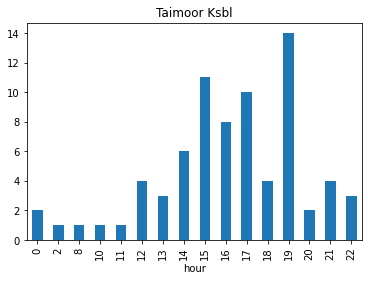

In [53]:
df['hour'] = df['date_time'].apply(lambda x: x.hour)
df[df['user']==me].groupby(['hour']).size().sort_index().plot(x="hour", kind='bar',title=me)

## Q 4) 
## What is the difference in Weekend vs Weekday usage pattern?
## How many words do I type on average on weekday vs weekend?

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.weekday.html

In [20]:
df['weekday'] = df['date_time'].apply(lambda x: x.day_name()) # can use day_name or weekday from datetime 

In [21]:
df['is_weekend'] = df.weekday.isin(['Sunday', 'Saturday'])

In [22]:
msgs_per_user = df['user'].value_counts(sort=True)
msgs_per_user

Taimoor Ksbl              75
Usman Ksbl                71
Mir Rafay Hussain Ksbl    70
Shahid Ksbl               64
Ahsan KSBL                58
Saad Ksbl                 52
+92 345 6187766           49
Arsalan Mushtaq Ksbl      44
Maaz Ksbl                 37
Zeeshan Jessani Ksbl      36
Sohaib Qureshi Ksbl       34
Fahad Ksbl                32
Adnan Ksbl                31
Khushnaveed Ksbl          30
Jz Ksbl                   29
Zohaib Ksbl               29
Jimmy Ksbl                29
Salman Ksbl               27
Bariya Ksbl               27
Mustafa Chaudh Ksbl       24
Shahzeb Ksbl              23
+92 301 8203999           22
Shahan                    19
Rehman Ksbl               18
+92 307 0220252           18
+1 (919) 937-0545         18
Shariq Ksbl               16
Mohsin Puri Ksbl          16
Yasir Ksbl                15
Aisar Ksbl                14
Budhani KSBL              14
Danish Ksbl               13
Rida Zubairi              12
Khubab Ksbl               11
+92 300 700111

In [23]:
top10_users = msgs_per_user.index.tolist()[:10]
top10_users

['Taimoor Ksbl',
 'Usman Ksbl',
 'Mir Rafay Hussain Ksbl',
 'Shahid Ksbl',
 'Ahsan KSBL',
 'Saad Ksbl',
 '+92 345 6187766',
 'Arsalan Mushtaq Ksbl',
 'Maaz Ksbl',
 'Zeeshan Jessani Ksbl']

In [24]:
df_top10 = df.copy()
df_top10 = df_top10[df_top10.user.isin(top10_users)]
df_top10.head()

,date_time,user,msg,hour,weekday,is_weekend
0,2019-04-12 12:07:00,Mir Rafay Hussain Ksbl,"asa.. if anyone has a Faysal bank world card, ...",12,Friday,False
1,2019-04-28 10:55:00,Maaz Ksbl,Can anyone share email address on which they a...,10,Sunday,True
3,2019-04-28 11:03:00,Maaz Ksbl,Thanks allot.,11,Sunday,True
4,2019-04-28 11:03:00,Maaz Ksbl,Alot*,11,Sunday,True
6,2019-04-29 00:19:00,Ahsan KSBL,,0,Monday,False


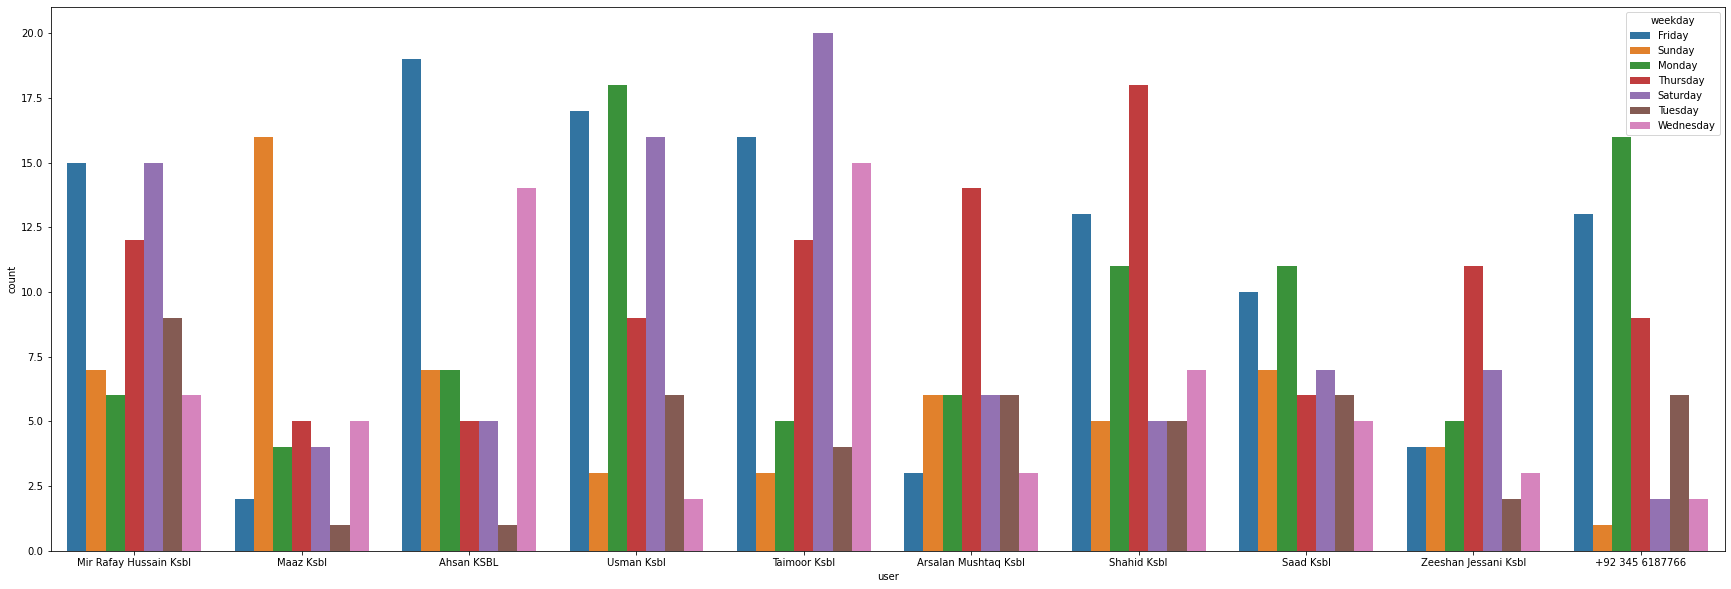

In [25]:
plt.figure(figsize=(30,10))
sns.countplot(x="user", hue="weekday", data=df_top10)

In [26]:
df_top10['is_weekend'] = df_top10.weekday.isin(['Sunday', 'Saturday'])

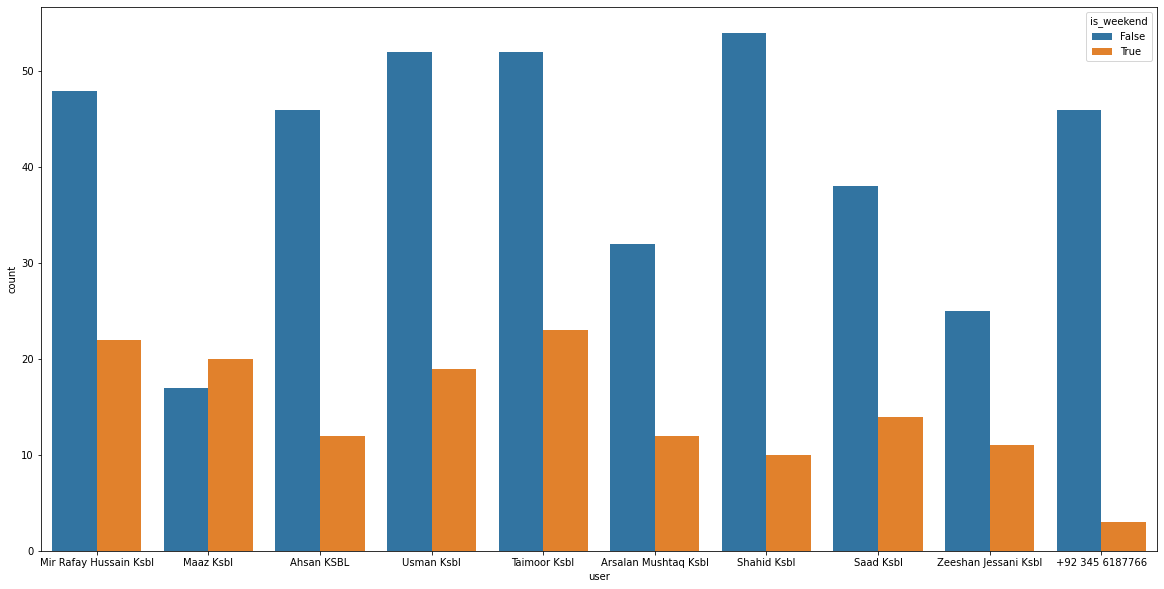

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(x="user", hue="is_weekend", data=df_top10)

In [28]:
def word_count(val):
    return len(val.split())

In [29]:
df['no_of_words'] = df['msg'].apply(word_count)

In [30]:
df_top10['no_of_words'] = df_top10['msg'].apply(word_count)

In [31]:
total_words_weekday = df[df['is_weekend']==False]['no_of_words'].sum()
total_words_weekday

8399

In [32]:
total_words_weekend = df[df['is_weekend']]['no_of_words'].sum()
total_words_weekend

2313

In [33]:
total_words_weekday/5 # average words on a weekday

1679.8

In [34]:
total_words_weekend/2 # average words on a weekend

1156.5

In [35]:
df.groupby('user')['no_of_words'].sum().sort_values(ascending=False)

user
Ahsan KSBL                1118
Zeeshan Jessani Ksbl      1026
Shahid Ksbl                818
Khushnaveed Ksbl           762
Usman Ksbl                 682
Taimoor Ksbl               632
Arsalan Mushtaq Ksbl       409
Mir Rafay Hussain Ksbl     375
Jimmy Ksbl                 305
Mustafa Chaudh Ksbl        278
Maaz Ksbl                  278
Adnan Ksbl                 271
Fahad Ksbl                 244
+92 345 6187766            238
Zohaib Ksbl                234
Shahan                     219
Jz Ksbl                    204
+92 301 8203999            197
Bariya Ksbl                193
Rida Zubairi               185
Salman Ksbl                184
Sohaib Qureshi Ksbl        182
Saad Ksbl                  171
Khubab Ksbl                138
+92 331 2362997            119
+92 307 0220252            109
Qudrat KSBL                107
Danish Ksbl                100
Shahzeb Ksbl                82
Aisar Ksbl                  75
Salik Ksbl                  71
Shariq Ksbl                 67
Reh

In [36]:
(df_top10.groupby('user')['no_of_words'].sum()/df_top10.groupby('user').size()).sort_values(ascending=False)

user
Zeeshan Jessani Ksbl      28.500000
Ahsan KSBL                19.275862
Shahid Ksbl               12.781250
Usman Ksbl                 9.605634
Arsalan Mushtaq Ksbl       9.295455
Taimoor Ksbl               8.426667
Maaz Ksbl                  7.513514
Mir Rafay Hussain Ksbl     5.357143
+92 345 6187766            4.857143
Saad Ksbl                  3.288462
dtype: float64

In [37]:
wordPerMsg_weekday_vs_weekend = (df_top10.groupby(['user', 'is_weekend'])['no_of_words'].sum()/df_top10.groupby(['user', 'is_weekend']).size())
wordPerMsg_weekday_vs_weekend

user                    is_weekend
+92 345 6187766         False          5.043478
                        True           2.000000
Ahsan KSBL              False         19.652174
                        True          17.833333
Arsalan Mushtaq Ksbl    False         10.250000
                        True           6.750000
Maaz Ksbl               False          7.058824
                        True           7.900000
Mir Rafay Hussain Ksbl  False          6.333333
                        True           3.227273
Saad Ksbl               False          3.736842
                        True           2.071429
Shahid Ksbl             False         13.666667
                        True           8.000000
Taimoor Ksbl            False          9.115385
                        True           6.869565
Usman Ksbl              False         10.192308
                        True           8.000000
Zeeshan Jessani Ksbl    False         38.840000
                        True           5.000000
dtype

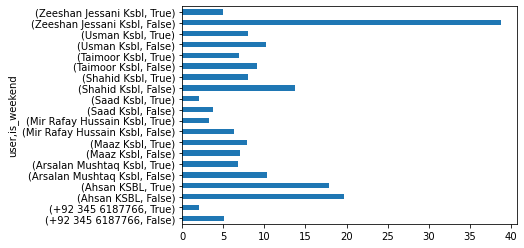

In [38]:
wordPerMsg_weekday_vs_weekend.plot(kind='barh')

## Q 5)
## Most Usage - Time of Day

In [39]:
x = df.groupby(['hour', 'weekday'])['msg'].size().reset_index()
x2 = x.pivot("hour", 'weekday', 'msg')
x2.head()

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,14.0,8.0,16.0,13.0,14.0,5.0,4.0
1,NaN,2.0,2.0,NaN,8.0,3.0,3.0
2,NaN,NaN,NaN,NaN,NaN,2.0,1.0
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN
6,NaN,1.0,NaN,1.0,2.0,NaN,1.0


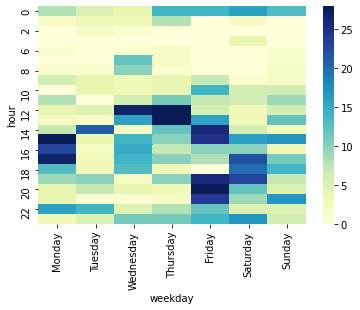

In [52]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.heatmap(x2[days].fillna(0), cmap="YlGnBu",robust=True)

## Q 6)
## In any group, do I have any inclination towards responding to someone? 

In [41]:
my_msgs_index = np.array(df[df['user']==me].index)
print(my_msgs_index, my_msgs_index.shape)

[  11   43   84  131  141  142  143  145  157  158  185  209  258  260
  263  295  309  363  373  401  451  455  456  466  498  503  515  517
  519  520  532  533  534  535  536  612  616  621  633  634  664  665
  695  703  720  721  722  728  753  780  788  792  814  815  817  821
  823  824  826  847  860  862  863  866  868  872  891  981 1006 1011
 1018 1019 1020 1123 1172] (75,)


In [42]:
prev_msgs_index = my_msgs_index - 1
print(prev_msgs_index, prev_msgs_index.shape)

[  10   42   83  130  140  141  142  144  156  157  184  208  257  259
  262  294  308  362  372  400  450  454  455  465  497  502  514  516
  518  519  531  532  533  534  535  611  615  620  632  633  663  664
  694  702  719  720  721  727  752  779  787  791  813  814  816  820
  822  823  825  846  859  861  862  865  867  871  890  980 1005 1010
 1017 1018 1019 1122 1171] (75,)


In [43]:
df_replies = df.iloc[prev_msgs_index].copy()
df_replies.shape

(75, 7)

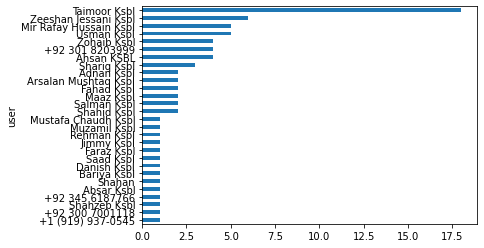

In [44]:
df_replies.groupby(["user"])["msg"].size().sort_values().plot(kind='barh')

## Q 7)
## Which are the most common words?

In [45]:
pip install python-bidi

In [46]:
import arabic_reshaper

In [47]:
from bidi.algorithm import get_display

In [48]:
comment_words = ' '
stopwords = STOPWORDS.update(['lo', 'hai','ge', 'Lo', 'illa', 'yea', 'ella', 'en', 'na', 'En', 'yeah', 'alli', 'ide', 'okay', 'ok', 'will'])
  
for val in df.msg.values: 
    
    val = arabic_reshaper.reshape(str(val) )
    val = get_display(val)
    
    tokens = val.split() 
            
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(font_path='arial',width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

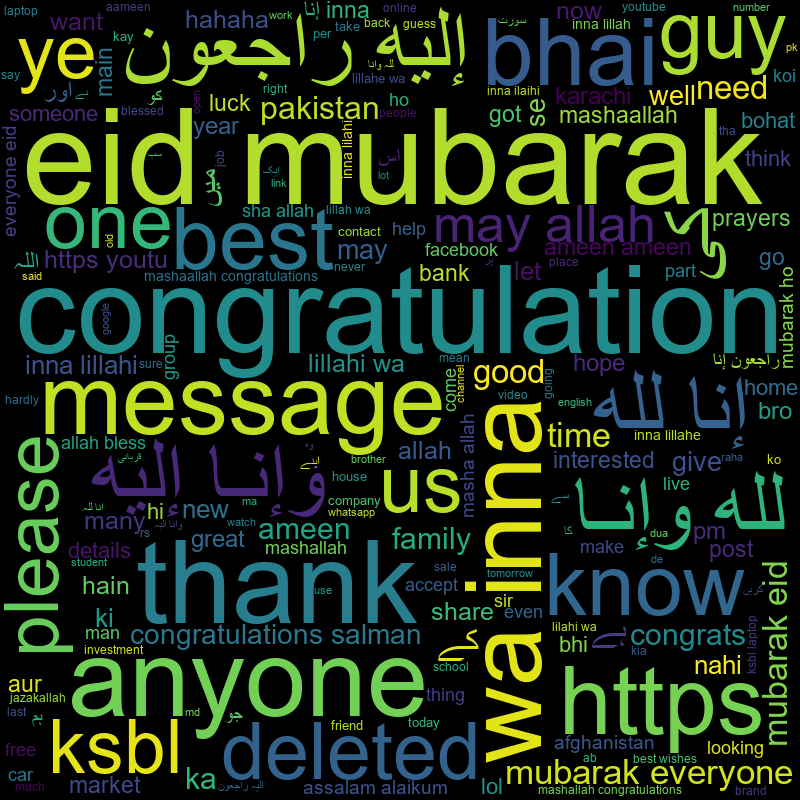

In [50]:
wordcloud.to_image()